# Python для Анализа Данных

# Домашнее задание 5: Научные вычисления с NumPy и SciPy

## Задачи Light

### Задача 1: Вычисления по цепочке

Напишите функцию, которая возвращает значение следующей математической функции в зависимости от переменной х, где x - одномерный вектор.

$f(x) = \frac{1}{2}x^2 arctg(x) + 5cos(2x) + e^{x} + \log{6x}$

Проверьте работу функции на заданном векторе

P.S. косинус, арктангенс и т.д. доступны в библиотеке numpy: np.arctan() ...

In [52]:
import numpy as np
x = np.array([3, 5, 8])

In [53]:
rslt = []
for i in x:
    rslt.append(0.5 * i ** 2 * np.arctan(i) + 5 * np.cos(2 * i) + np.exp(i) + np.log10(6*i))
print(f'для вектора x: {x} функция принимает значения: {rslt}')

для вектора x: [3 5 8] функция принимает значения: [31.762366837334948, 162.8624322987267, 3024.1370535094275]


### Задача 2: Вычисления по цепочке

Напишите функцию, которая вычисляет значение следующей математической функции в зависимости от переменной х, где х - вектор

$F(x) = \frac{3}{4}AA^Tx + Bx + c$


In [54]:
np.random.seed(42)

A = np.random.randint(low=1, high=5, size=(3,3))
B = np.random.randint(low=1, high=5, size=(3,3))
c = np.random.randint(low=1, high=5, size=(3))
c = np.random.randint(low=1, high=5, size=(3))

In [55]:
A

array([[3, 4, 1],
       [3, 3, 4],
       [1, 1, 3]])

In [56]:
B

array([[2, 3, 3],
       [3, 3, 4],
       [1, 4, 4]])

In [57]:
c

array([1, 2, 4])

In [58]:
x

array([3, 5, 8])

In [59]:
# функция
3 / 4 * A.dot(A.T).dot(x) + B.dot(x) + c

array([258.25, 349.75, 215.  ])

### Задача 3: 

Дана разреженная матрица, преобразуйте ее в csr формат, посчитайте долю разреженности, т.е. содержания нулей

In [60]:
# фиксируем сид
np.random.seed(42)

A = np.eye(50)
A[5, :] = np.random.randint(low=0, high=2, size = (50))
A[31, :] = np.random.randint(low=0, high=2, size = (50))
A[:, 49] = np.random.randint(low=0, high=2, size = (50))

In [61]:
A

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [62]:
print(f'размер исходной матрицы {A.shape}')

размер исходной матрицы (50, 50)


In [63]:
from scipy.sparse import csr_matrix

In [64]:
A_csr = csr_matrix(A)
print(f'размер csr матрицы {A_csr.shape}')
print(f'\nпервые строки матрицы:\n{A_csr[:5]}')

размер csr матрицы (50, 50)

первые строки матрицы:
  (0, 0)	1.0
  (1, 1)	1.0
  (1, 49)	1.0
  (2, 2)	1.0
  (2, 49)	1.0
  (3, 3)	1.0
  (3, 49)	1.0
  (4, 4)	1.0
  (4, 49)	1.0


In [65]:
print(f'доля разряженности: {1 - np.count_nonzero(A) / A.size}')

доля разряженности: 0.9488


### Задача 4

Даны две разреженные матрицы, преобразуйте их в формат csr и посчитайте:

* сумму двух матриц
* матричное произведение двух матриц
* выведите на экран сумму и произведение, предварительно преобразовав их обратно в "плотный" формат (метод .todense)

In [66]:
# фиксируем сид
np.random.seed(42)

A = np.eye(50)
A[2, :] = np.random.randint(low=0, high=2, size = (50))
A[37, :] = np.random.randint(low=0, high=2, size = (50))
A[:, 44] = np.random.randint(low=0, high=2, size = (50))

B = np.zeros((50,50))
B[2, :] = np.random.randint(low=0, high=2, size = (50))
B[37, :] = np.random.randint(low=0, high=2, size = (50))
B[:, 44] = np.random.randint(low=0, high=2, size = (50))

In [67]:
# преобразую в csr
A_csr = csr_matrix(A)
B_csr = csr_matrix(B)

In [68]:
# для ручной проверки выведу пару строк
n = 2
print(f'A:\n{(A_csr)[:n]}')
print(f'B:\n{(B_csr)[:n]}')

A:
  (0, 0)	1.0
  (1, 1)	1.0
  (1, 44)	1.0
B:
  (0, 44)	1.0


In [69]:
# суммирую матрицы, вывожу n первых строк
sum_csr = A_csr + B_csr
print(f'сумма матриц:\n{sum_csr[:n]}')

сумма матриц:
  (0, 0)	1.0
  (0, 44)	1.0
  (1, 1)	1.0
  (1, 44)	1.0


In [70]:
# перемножаю матрицы, вывожу n первых строк
mlt_csr = A_csr.dot(B_csr)
print(f'произвдеение матриц A на B:\n{mlt_csr[:n]}')

произвдеение матриц A на B:
  (0, 44)	1.0
  (1, 44)	1.0


In [71]:
# на всякий чекаю размерность
print((A_csr.dot(B_csr)).shape)

(50, 50)


In [72]:
# сумма в стандартном формате
sum_csr.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [73]:
# сумма в стандартном формате
mlt_csr.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
# для интереса сравню элемент суммированной матрицы в двух форматах
print(f'сумма элемент [0,44]: csr матрица {sum_csr[0,44]}, стандартная форма: {mlt_csr.todense()[0, 44]}')
# аналогично для произведения
print(f'произведение элемент [1,44]: csr матрица {mlt_csr[1,44]}, стандартная форма: {mlt_csr.todense()[1, 44]}')

сумма элемент [0,44]: csr матрица 1.0, стандартная форма: 1.0
произведение элемент [1,44]: csr матрица 1.0, стандартная форма: 1.0


## Задачи Pro

### Задача 5

Даны данные о кол-ве посетителей мобильного приложения за 3 месяца на ежедневной основе. С помощью матрицы Тоеплица посчитайте значения показателя Sticky Factor за весь период

$Sticky Factor = \frac{DAU}{MAU}$, где

* MAU - Monthly Active Users, кол-во посетителей за месяц, считается на ежедневной основе как сумма кол-ва посетителей за 30 дней (т.е. каждый день берется окно в 30 дней назад) - это нужно посчитать
* DAU - Daily Active Users, кол-во уникальных посетителей за день - эти данные нам уже даны

Нужно посчитать исторические значения Sticky Factor (SF) на ежедневной основе начиная с момента, как SF определен, т.е. начиная с 30го дня.

In [75]:
np.random.seed(42)

DAU = np.random.randint(low=0, high=2000, size = (30*3))

In [76]:
DAU

array([1126, 1459,  860, 1294, 1130, 1095, 1724, 1044, 1638,  121,  466,
       1238,  330, 1482,   87, 1396, 1123,  871, 1687,  130, 1685, 1332,
        769,  343, 1515, 1437,  805,  385, 1215,  955,  276, 1184,  459,
       1337,   21,  252,  747,  856, 1584,  474, 1082,  510, 1705, 1499,
        699,  975, 1806,  189,  957,  686,  957,  562, 1899, 1590, 1267,
        831, 1528, 1154, 1508, 1842,  646,   20,  840,  166, 1297,  387,
        600,  315,   13,  241,  776, 1369,  564,  897, 1363,   91, 1390,
        955, 1478, 1451,  508,  775, 1966,   34,  205, 1104, 1955, 1585,
       1895, 1411])

In [77]:
import scipy as sp
from scipy import linalg

In [78]:
# формирую матрицу топлица на данных DAU для периода, размерность 90 * 30
DAU_tplz = sp.linalg.toeplitz(DAU, np.zeros(30))

In [79]:
# sticky factor
sf = DAU_tplz.mean(axis=1)
# хочу вывести результат по дням
days = np.arange(29, len(DAU_tplz))
print('день, sticky factor:')
rslt = list(zip(days,sf))
for i in range(len(rslt)):
    print(rslt[i])

день, sticky factor:
(29, 37.53333333333333)
(30, 86.16666666666667)
(31, 114.83333333333333)
(32, 157.96666666666667)
(33, 195.63333333333333)
(34, 232.13333333333333)
(35, 289.6)
(36, 324.4)
(37, 379.0)
(38, 383.03333333333336)
(39, 398.56666666666666)
(40, 439.8333333333333)
(41, 450.8333333333333)
(42, 500.23333333333335)
(43, 503.1333333333333)
(44, 549.6666666666666)
(45, 587.1)
(46, 616.1333333333333)
(47, 672.3666666666667)
(48, 676.7)
(49, 732.8666666666667)
(50, 777.2666666666667)
(51, 802.9)
(52, 814.3333333333334)
(53, 864.8333333333334)
(54, 912.7333333333333)
(55, 939.5666666666667)
(56, 952.4)
(57, 992.9)
(58, 1024.7333333333333)
(59, 996.4)
(60, 987.2333333333333)
(61, 973.8666666666667)
(62, 975.3)
(63, 938.3333333333334)
(64, 910.2333333333333)
(65, 877.6666666666666)
(66, 871.4)
(67, 869.6)
(68, 881.3666666666667)
(69, 901.9)
(70, 877.6333333333333)
(71, 923.4666666666667)
(72, 924.0333333333333)
(73, 944.4333333333333)
(74, 930.4)
(75, 953.1666666666666)
(76, 930.43

### Задача 6

Есть данные о продажах домов за период. Код для подгрузки данных приведен ниже. 

* Для подгруженных данных, сделайте SVD разложение
* Нарисуйте график динамики сингулярных значений (код приведен)
* Визуально определите наилучший порог отсечения k
* Используя этот порог, найдите матрицу меньшей размерности, которая будет наилучшим приближением к исходной.

In [80]:
import pandas as pd
data = pd.read_csv('train.csv', index_col=0)

cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',\
               'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea','SalePrice', 'YrSold']

data = data[cols]
data.dropna(inplace=True)
data = data.values

In [81]:
U, S, V = np.linalg.svd(data)

In [82]:
# проверяю размерность
print(f'data:\n{data.shape}\nU:\n{U.shape}\nS\n{S.shape}\nV\n{V.shape}')


data:
(1121, 16)
U:
(1121, 1121)
S
(16,)
V
(16, 16)


In [83]:
import matplotlib.pyplot as plt

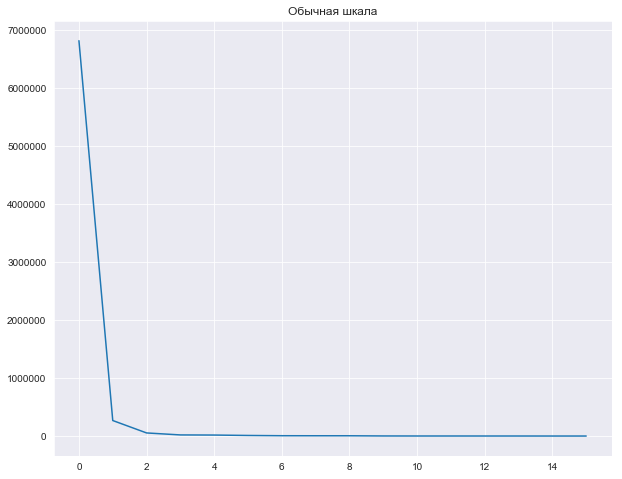

In [84]:
plt.figure(figsize=(10,8))
plt.title('Обычная шкала')
plt.plot(S)
#plt.yscale('log')
plt.show()

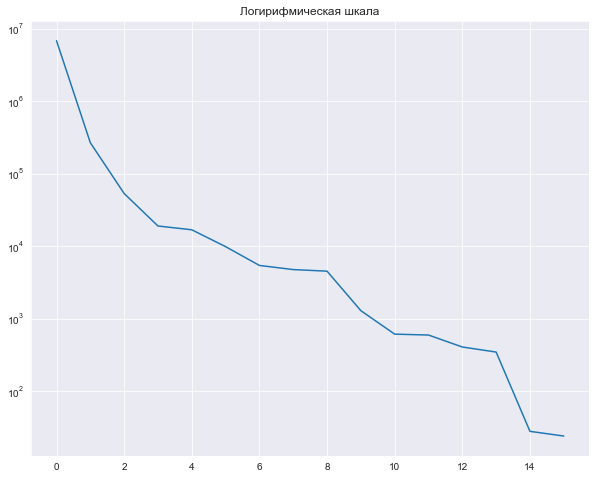

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

plt.figure(figsize=(10,8))
plt.title('Логирифмическая шкала')
plt.plot(S)
plt.yscale('log')
plt.show()

In [86]:
S

array([6.81382560e+06, 2.67275328e+05, 5.33256287e+04, 1.90019340e+04,
       1.68518341e+04, 9.87117453e+03, 5.43322675e+03, 4.76525052e+03,
       4.53066340e+03, 1.29271871e+03, 6.13839586e+02, 5.96389248e+02,
       4.08073577e+02, 3.47668796e+02, 2.80474810e+01, 2.41771306e+01])

In [87]:
for i in range(1, len(S)):
    print(i, S[:-i].sum()/S.sum())

1 0.9999966412215564
2 0.9999927447593961
3 0.9999444452951218
4 0.9998877541701613
5 0.9998049015197251
6 0.9997196246023309
7 0.9995400352293607
8 0.9989106183311234
9 0.998248611702544
10 0.9974938072888515
11 0.9961224663817908
12 0.9937813458422509
13 0.991141525291764
14 0.9837333272219873
15 0.9466024275575733


Предполагаю, что потрея менее 0,1% не критична, поэтому можно оставить первые 7 элементов.